# Atividade 02 - Zeros de Funções Reais

Nome completo: Marcel Gustavo de Barros Araujo

Data: 23/04/2025

# Introdução

O presente trabalho apresenta o relatório da implementação computacional de diferentes técnicas numéricas estudadas na disciplina de Cálculo Numérico, lecionada às turmas de engenharia da Unidade Acadêmica de Belo Jardim. Utiliza-se a linguagem Python para a implementação dos algoritmos e considera-se a função

$$ f(x) = x^2 - x \ln\left(\frac{1}{x}\right) $$

In [ ]:
import math as m
import numpy as np

# defina aqui a sua função
def f(x):
  return x**2 - x * np.log(1/x)

# Estudo do sinal da função

A função $f(x) = x^2 - x \ln\left(\frac{1}{x}\right)$ possui pelo menos um zero no intervalo $(a,b)$, considerando o intervalo de $(0.2,1)$ uma vez que $f(a) = −0.2818 $, $f(b) = 1$, de modo que a função troca de sinal no intervalo considerado.

Calculando-se a derivada da função obtem-se

$$f'(x) = 2x + \ln(x) + 1$$

Verifica-se que $f'(x)>0 \, (ou <0)$ para todo $x\in(a,b)$. Portanto, como a derivada não troca de sinal em $(a,b)$, existe um único zero para $f(x)$ neste intervalo.

O intervalo $(a,b)$ será utilizada para todos os métodos numéricos a serem implementados, a fim de comparação de eficiência entre os métodos.



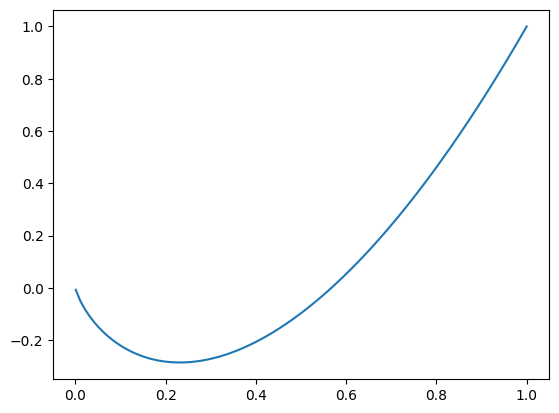

In [ ]:
#Plote o gráfico da função caso ache conveniente para a análise do sinal da função.
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.001, 1, 100)
y = f(x)
plt.plot(x,y)
plt.show()

In [ ]:
# defina o intervalo
a0 = 0.2
b0 = 1

Para todos os os métodos a serem implementados e comparados, será considerada a precisão $ɛ=0.00009$ de quatro casas decimais, como segue:

In [ ]:
# precisão
e = 0.00009

# Método da Bissecção

"""
O método da bissecção é utilizado para encontrar raízes de uma função contínua em um intervalo [a, b] onde a função troca de sinal (f(a) e f(b) têm sinais opostos).
O algoritmo segue os passos:
1. Calcula o ponto médio M = (a + b)/2.
2. Verifica em qual subintervalo ([a, M] ou [M, b]) a função muda de sinal.
3. Atualiza o intervalo substituindo a ou b por M, mantendo a raiz dentro do novo intervalo.
4. Repete os passos até que a largura do intervalo (b - a) seja menor que a precisão ε desejada.
5. Retorna o ponto médio final como aproximação da raiz e o número de iterações realizadas.

"""

In [ ]:
# Implemente aqui o algoritmo do método da bissecção usando a sua função, o intervalo (a,b) e a precisão considera.
# Obtenha sempre o número de iterações necessárias à convergência a fim de comparação entre os métodos.

#k contabiliza as iterações
a = a0
b = b0
k = 0
while b-a>e:
  M=(a+b)/2

  if f(a)*f(M) < 0:
    b=M
  else:
    a=M
  k=k+1

print('A solução encontrada foi', M)
print('O número de iterações foi', k)

A solução encontrada foi 0.567138671875
O número de iterações foi 14


# Método da Posição Falsa

"""
Descrição do Método:
O método da posição falsa (ou regula falsi) é um algoritmo numérico para encontrar raízes de uma função contínua em um intervalo [a, b] onde a função troca de sinal (f(a) * f(b) < 0).
Diferentemente da bissecção, que usa o ponto médio, este método calcula uma média ponderada entre a e b, aproximando-se mais rapidamente da raiz.
A cada iteração, o novo ponto M é calculado pela interseção da reta que liga (a, f(a)) e (b, f(b)) com o eixo x.
O processo se repete até que |f(M)| < ε ou o intervalo seja suficientemente pequeno.
"""

In [ ]:
# Implemente aqui o algoritmo do método da posição usando a sua função, o intervalo (a,b) incial e a precisão considera.
# Obtenha sempre o número de iterações necessárias à convergência a fim de comparação entre os métodos.
a = a0
b = b0
it_max = 100
for k in range(1, it_max+1):
  M =((a*f(b)-b*f(a))/(f(b)-f(a))) #Média ponderada

  if f(a)*f(M)<0:
    b= M
  else:
    a=M

    #Crítério de Parada
  if abs(f(M))<e:
    break

print('A solução encontrada foi', M)
print('O número de iterações foi', k)

A solução encontrada foi 0.567112914248785
O número de iterações foi 9


# Método do Ponto Fixo  

O método do ponto fixo consiste em obter uma função de iteração $\phi(x)$ a partir da equação $f(x) = 0$.  

Supondo que a função de iteração é convergente, usa-se uma condição inicial $x_0\in(a,b)$ e executa a rotina  
$$x_{k+1} = \phi(x_k)$$ até que $|f(x_k)|<ɛ$ onde $ɛ$ é a precisão indicada.  

Para verificar se a função de iteração é convergente, resolvemos a inequação modular  
$$ |\phi'(x)| < 1$$  
e verificamos a intersecção do intervalo obtido nesta inequação com o intervalo inicial $(a,b)$. A condição inicial $x_0$ deve estar nesta intersecção.  

Para a função dada $f(x) = x^2 - x \ln\left(\frac{1}{x}\right)$, obtemos a função de iteração:  

### **1. Primeira Função de Iteração**  
$$  
\phi(x) = -\ln(x)  
$$  
A inequação modular $|\phi'(x)| < 1$ produz:  
$$  
\left|-\frac{1}{x}\right| < 1 \implies x > 1  
$$  
que resulta no intervalo:  
$$  
(1, \infty)  
$$  
Portanto, a função de iteração **não é convergente** pois o intervalo obtido não intersecta $(0.2,1)$.  

---

### **2. Segunda Função de Iteração**  
$$  
\phi(x) = e^{-x}  
$$  
A inequação modular $|\phi'(x)| < 1$ produz:  
$$  
\left|-e^{-x}\right| < 1 \implies e^{-x} < 1 \implies x > 0  
$$  
que resulta no intervalo:  
$$  
(0, \infty)  
$$  
Portanto, a função de iteração **é convergente** pois todo o intervalo $(0.2,1)$ está contido em $(0, \infty)$.  

---

### **3. Terceira Função de Iteração**  
$$  
\phi(x) = \sqrt{-x \ln(x)}  
$$  
A inequação modular $|\phi'(x)| < 1$ produz:  
$$  
\left|\frac{-\ln(x) - 1}{2\sqrt{-x \ln(x)}}\right| < 1  
$$  
que resulta no intervalo aproximado:  
$$  
x \in (0.2, 0.823)  
$$  
Portanto, a função de iteração **é convergente parcialmente** pois apenas o subintervalo $(0.2,0.823)$ satisfaz a condição.  

---

### **Resumo Final**  
- **Função 1 ($-\ln(x)$):**  Não converge.  
- **Função 2 ($e^{-x}$):** Convergente em todo $(0.2,1)$.  
- **Função 3 ($\sqrt{-x \ln(x)}$):** Convergente apenas em $(0.2,0.823)$.  

**Observação encontrada:** Usando esse $\boxed{\phi(x) = e^{-x}}$ garante convergência no intervalo completo pois o Domínio dessa função é maior. Por isso abaixo no algoritmo utilizei essa função como base.  

In [ ]:
# Implemente aqui o algoritmo do método do ponto fixo usando a sua função,
# tomando uma condição inicial no intervalo (a,b) inicial, use a média do intervalo, e a precisão considera.
# Obtenha sempre o número de iterações necessárias à convergência a fim de comparação entre os métodos.
import numpy as np
a = a0
b = b0
#Para esse Código utilizei a segunda função de Interação
def phi(x):
  return np.exp(-x)


x0 = (a+b)/2
x_k = x0

it_max_ponto_fixo = 100

for k in range(1, it_max_ponto_fixo):
  print(x_k)
  x_k = phi(x_k)


  if abs(f(x_k))< e:
    break

print('A solução encontrada foi', x_k)
print('O número de iterações foi', k)


0.6
0.5488116360940264
0.5776358442589157
0.5612236194379727
0.5705105487806048
0.565236784068813
0.5682255840612201
0.5665298068716721
0.5674913302296352
0.5669459363066952
0.5672552295106426
0.5670798084529203
A solução encontrada foi 0.5671792949184874
O número de iterações foi 12


# Método de Newton

O método de Newton é um caso especial do método do ponto fixo que consiste em usar a função de iteração  
$$
\phi(x_k) = x_k - \dfrac{f(x_k)}{f'(x_k)}
$$  
Este método é convergente se $f'(x) \neq 0$ e $f''(x)$ existir e for contínua em $(a,b)$. Verificando, observamos que:  

### **Derivadas da Função**  
Para $f(x) = x^2 - x \ln\left(\frac{1}{x}\right)$ (equivalente a $f(x) = x^2 + x \ln(x)$):  

1. **Primeira Derivada:**  
   $$
   f'(x) = 2x + \ln(x) + 1
   $$  

2. **Segunda Derivada:**  
   $$
   f''(x) = 2 + \frac{1}{x}
   $$  

---

### **Verificação das Condições de Convergência**  
1. **Continuidade de $f''(x)$:**  
   $f''(x) = 2 + \frac{1}{x}$ é contínua em $(0.2, 1)$, pois $\frac{1}{x}$ é contínua para $x > 0$.  

2. **$f'(x) \neq 0$ no intervalo $(0.2, 1)$:**  
   - Para $x \in (0.2, 1)$:  
     - $f'(0.2) \approx -0.209$ (negativo),  
     - $f'(1) = 3$ (positivo).  
   - Como $f'(x)$ é estritamente crescente (pois $f''(x) > 0$), existe **um único ponto crítico** $c \in (0.2, 1)$ onde $f'(c) = 0$.  
    

---

In [ ]:
# Implemente aqui o algoritmo do método de Newton usando a sua função,
# tomando uma condição inicial no intervalo (a,b) inicial, use a média do intervalo, e a precisão considera.
# Obtenha sempre o número de iterações necessárias à convergência a fim de comparação entre os métodos.

def f_linha(x):
  return 2*x + np.log(x) + 1

#condição inicial
x0 = (a+b)/2
x_k = x0

it_max_newton = 100

for k in range(1, it_max_newton+1):
  print(x_k)
  x_k = x_k - f(x_k)/f_linha(x_k)

#critério de parada
  if abs(f(x_k))< e:
    break

print('A solução encontrada foi', x_k)
print('O número de iterações foi', k)

0.6
0.5683249837949275
A solução encontrada foi 0.5671449611868847
O número de iterações foi 2


# Método da Secante

O método da secante é uma discretização do método de Newton que substitui a derivada por uma aproximação baseada na reta secante entre dois pontos iterativos anteriores. As iterações são calculadas por:  
$$
x_{k+1} = \dfrac{x_{k-1} \cdot f(x_k) - x_k \cdot f(x_{k-1})}{f(x_k) - f(x_{k-1})}
$$  
Assim, são necessárias **duas condições iniciais** \(x_0\) e \(x_1\) no intervalo \(a,b)\. O método converge se as estimativas iniciais estiverem suficientemente próximas da raiz e \(f(x)\) for suave no intervalo.

---

In [ ]:
# Implemente aqui o algoritmo do método da secante usando a sua função,
# tomando duas condições iniciais no intervalo (a,b) inicial, e a precisão considera.
# Obtenha sempre o número de iterações necessárias à convergência a fim de comparação entre os métodos.

#condições iniciais
x0 = 0.4
x1 = 0.8
x2 = (x0+x1)/2

it_max_secante = 100

for k in range(1, it_max_secante+1):
  print(x2)
  x2 = (x0 * f(x1) - x1 * f(x0))/ (f(x1) - f(x0))
  x0 = x1
  x1 = x2

#critério de parada
  if abs(f(x2))< e:
    break

print('A solução encontrada foi', x2)
print('O número de iterações foi', k)

0.6000000000000001
0.5236621820055182
0.5575668438864406
0.5676858620531668
A solução encontrada foi 0.5671369674547845
O número de iterações foi 4


# Resultados e Discussões  

Dentre os resultados obtidos, verificou-se que o método **de Newton** apresentou melhor eficiência com base no número de iterações (apenas 2 iterações), seguido pelo método **da Secante** (4 iterações). O método **do ponto fixo** (φ(x) = e⁻ˣ) convergiu em 12 iterações, enquanto o método **da posição falsa** e **da bissecção** foram os mais lentos, com 9 e 14 iterações, respectivamente.  

### **Análise Comparativa**  
| Método           | Raiz Aproximada      | Iterações | Eficiência Relativa |  
|------------------|----------------------|-----------|---------------------|  
| Bissecção        | 0.567138671875       | 14        | Mais lento          |  
| Posição Falsa    | 0.567112914248785    | 9         | Intermediário       |  
| Ponto Fixo       | 0.5671792949184874   | 12        | Lento*              |  
| Newton           | 0.5671449611868847   | 2         | Mais rápido         |  
| Secante          | 0.5671369674547845   | 4         | Rápido              |  

\*A convergência do método do ponto fixo depende criticamente da escolha da função φ(x).  

---

### **Dificuldades Encontradas**  
1. **Método do Ponto Fixo:**  
   - A convergência só foi garantida com a função φ(x) = e⁻ˣ e φ₃(x) = √(-x ln x). A outra função proposta (φ₁(x) = -ln(x)) **não convergiu** resultando no erro 'nan' que seria not a number por executar divesas operações com números inexistentes, exigindo análise prévia das condições de convergência.  
   - A escolha inadequada de φ(x) pode levar a divergência ou a um número elevado de iterações.  

2. **Método de Newton:**  
   - Requer o cálculo manual da derivada \( f'(x) \), o que pode ser complexo para funções não lineares mais elaboradas.  
   - Sensibilidade à escolha de \( x_0 \): valores próximos ao ponto crítico \( c \approx 0.406 \) podem causar instabilidade.  

3. **Método da Secante:**  
   - Necessidade de duas estimativas iniciais próximas da raiz (\( x_0 = 0.4 \) e \( x_1 = 0.8 \) foram usadas).  
   - Convergência não garantida se as estimativas iniciais forem mal escolhidas.  

---

### **Conclusão**  
- **Método de Newton** é o mais eficiente para funções com derivadas conhecidas e bem comportadas.  
- **Método da Secante** é uma boa alternativa quando a derivada é difícil de calcular.  
- **Método do Ponto Fixo** exige cuidado na escolha da função de iteração, pode ser que dependendo da função que você esteja utilizando não tenha tanta eficiência este método.  
- **Bissecção** e **Posição Falsa** são confiáveis, mas lentos, ideais para implementações simples onde a velocidade não é crítica.  

**Observação:** Para problemas com derivadas acessíveis, priorize o método de Newton. Caso contrário, use a secante ou a posição falsa. E também de acordo com os valores encontrados a partir da Quinta casa decimal após a vírgula a uma pequena diferença de valores encontrados.  